### Save by class

In [1]:
import json
import os

# Path to the JSON file
json_path = '/n/netscratch/konkle_lab/Everyone/Jingxuan/DiffusionObjectRelation/T2I-CompBench-main/examples/labels/annotation_obj_detection_2d/detailed_scores.json'

# Function to load and analyze the JSON data
def analyze_scores(json_file):
    # Check if file exists
    if not os.path.exists(json_file):
        print(f"Error: File {json_file} not found.")
        return
    
    try:
        # Load the JSON data
        with open(json_file, 'r') as f:
            data = json.load(f)
            
        # Initialize lists to store question_ids for each case
        case1_ids = []  # Either object detected is False
        case2_ids = []  # Both objects detected is True but spatial score is 0
        case3_ids = []  # Both objects detected is True and spatial score is 1
        
        # Analyze each sample
        for sample in data:
            question_id = sample.get('question_id')
            obj1_detected = sample.get('obj1_detected')
            obj2_detected = sample.get('obj2_detected')
            spatial_score = sample.get('spatial_relationship_score')
            
            # Case 1: Either object detected is False
            if not obj1_detected or not obj2_detected:
                case1_ids.append(question_id)
            
            # Case 2: Both objects detected is True but spatial score is 0
            elif obj1_detected and obj2_detected and spatial_score == 0:
                case2_ids.append(question_id)
            
            # Case 3: Both objects detected is True and spatial score is 1
            elif obj1_detected and obj2_detected and spatial_score == 1:
                case3_ids.append(question_id)
        
        # Print the results
        print(f"Case 1 (Either object not detected): {len(case1_ids)} samples found")
        print(f"Question IDs: {case1_ids[:20]}..." if len(case1_ids) > 20 else f"Question IDs: {case1_ids}")
        
        print(f"\nCase 2 (Both objects detected but spatial score is 0): {len(case2_ids)} samples found")
        print(f"Question IDs: {case2_ids[:20]}..." if len(case2_ids) > 20 else f"Question IDs: {case2_ids}")
        
        print(f"\nCase 3 (Both objects detected and spatial score is 1): {len(case3_ids)} samples found")
        print(f"Question IDs: {case3_ids[:20]}..." if len(case3_ids) > 20 else f"Question IDs: {case3_ids}")
        
        # Return the results
        return {
            'case1_ids': case1_ids,
            'case2_ids': case2_ids,
            'case3_ids': case3_ids
        }
        
    except json.JSONDecodeError:
        print(f"Error: File {json_file} is not a valid JSON file.")
    except Exception as e:
        print(f"Error: {e}")


In [2]:
id_groups = analyze_scores(json_path)

Case 1 (Either object not detected): 549 samples found
Question IDs: [1, 6, 7, 8, 9, 11, 13, 14, 15, 16, 17, 19, 21, 24, 32, 34, 35, 36, 38, 39]...

Case 2 (Both objects detected but spatial score is 0): 205 samples found
Question IDs: [2, 3, 20, 22, 23, 26, 31, 37, 46, 48, 59, 63, 64, 67, 68, 80, 83, 85, 92, 93]...

Case 3 (Both objects detected and spatial score is 1): 188 samples found
Question IDs: [4, 10, 12, 18, 25, 27, 28, 29, 33, 41, 53, 70, 72, 77, 78, 81, 86, 89, 105, 108]...


In [3]:
with open('id_groups.json', 'w') as f:
    json.dump(id_groups, f)

In [5]:
id_groups['case2_ids']

[2,
 3,
 20,
 22,
 23,
 26,
 31,
 37,
 46,
 48,
 59,
 63,
 64,
 67,
 68,
 80,
 83,
 85,
 92,
 93,
 94,
 95,
 99,
 106,
 127,
 138,
 148,
 150,
 151,
 154,
 156,
 166,
 167,
 169,
 170,
 174,
 176,
 182,
 183,
 192,
 198,
 203,
 219,
 220,
 223,
 228,
 247,
 249,
 253,
 261,
 263,
 266,
 267,
 286,
 292,
 293,
 297,
 304,
 305,
 310,
 312,
 321,
 323,
 348,
 351,
 362,
 373,
 376,
 381,
 382,
 383,
 389,
 391,
 393,
 395,
 396,
 403,
 405,
 410,
 413,
 414,
 417,
 421,
 426,
 430,
 431,
 450,
 456,
 459,
 461,
 464,
 478,
 482,
 483,
 486,
 489,
 496,
 507,
 515,
 518,
 519,
 523,
 527,
 528,
 535,
 538,
 539,
 547,
 553,
 555,
 559,
 562,
 564,
 567,
 568,
 575,
 584,
 591,
 592,
 593,
 595,
 605,
 609,
 619,
 623,
 632,
 637,
 641,
 643,
 650,
 653,
 657,
 660,
 664,
 670,
 679,
 681,
 683,
 684,
 689,
 690,
 692,
 693,
 699,
 704,
 705,
 709,
 712,
 718,
 726,
 731,
 740,
 741,
 746,
 748,
 761,
 767,
 769,
 770,
 781,
 785,
 786,
 797,
 798,
 803,
 809,
 812,
 819,
 824,
 826,
 834,

In [6]:
id_groups['case3_ids']

[4,
 10,
 12,
 18,
 25,
 27,
 28,
 29,
 33,
 41,
 53,
 70,
 72,
 77,
 78,
 81,
 86,
 89,
 105,
 108,
 114,
 118,
 130,
 131,
 135,
 137,
 152,
 153,
 155,
 165,
 168,
 171,
 173,
 179,
 181,
 201,
 202,
 204,
 205,
 213,
 216,
 221,
 222,
 235,
 236,
 238,
 242,
 243,
 244,
 245,
 254,
 255,
 259,
 269,
 280,
 281,
 284,
 291,
 298,
 300,
 303,
 306,
 313,
 320,
 324,
 326,
 327,
 328,
 331,
 340,
 341,
 345,
 346,
 350,
 353,
 359,
 366,
 371,
 378,
 379,
 380,
 387,
 388,
 392,
 400,
 406,
 415,
 422,
 436,
 442,
 445,
 447,
 453,
 460,
 467,
 470,
 476,
 477,
 479,
 480,
 481,
 487,
 495,
 503,
 504,
 513,
 514,
 520,
 529,
 534,
 537,
 541,
 542,
 548,
 560,
 570,
 576,
 577,
 585,
 586,
 587,
 597,
 602,
 604,
 608,
 624,
 627,
 630,
 633,
 635,
 640,
 642,
 644,
 658,
 665,
 667,
 668,
 669,
 676,
 688,
 691,
 696,
 698,
 701,
 702,
 717,
 722,
 734,
 737,
 739,
 750,
 751,
 753,
 754,
 755,
 772,
 773,
 776,
 779,
 783,
 802,
 806,
 808,
 811,
 814,
 833,
 849,
 856,
 864,
 872,

### Examine correct objects class for single seed

In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict

# Read the detailed scores
score_path = '../examples/labels/2025-05-10_custom_epochunknown_stepunknown_scale4.5_step14_size512_bs8_sampdpm-solver_seed1/annotation_obj_detection_2d'
with open(score_path + '/detailed_scores.json', 'r') as f:
    data = json.load(f)

# Convert to DataFrame
df = pd.DataFrame(data)

# Filter entries where both objects are correctly generated
df_correct_objects = df[(df['obj1_detected'] == True) & (df['obj2_detected'] == True)]

# Save filtered entries
df_correct_objects.to_json(score_path + '/detailed_scores_correct_obj.json', orient='records', indent=2)




Summary Statistics:
Total number of entries: 1000
Number of entries with both objects detected: 459

Unique objects: 36
Unique spatial relationships: 7

Spatial relationships:
- on the right of
- near
- on the top of
- next to
- on the bottom of
- on the left of
- on side of


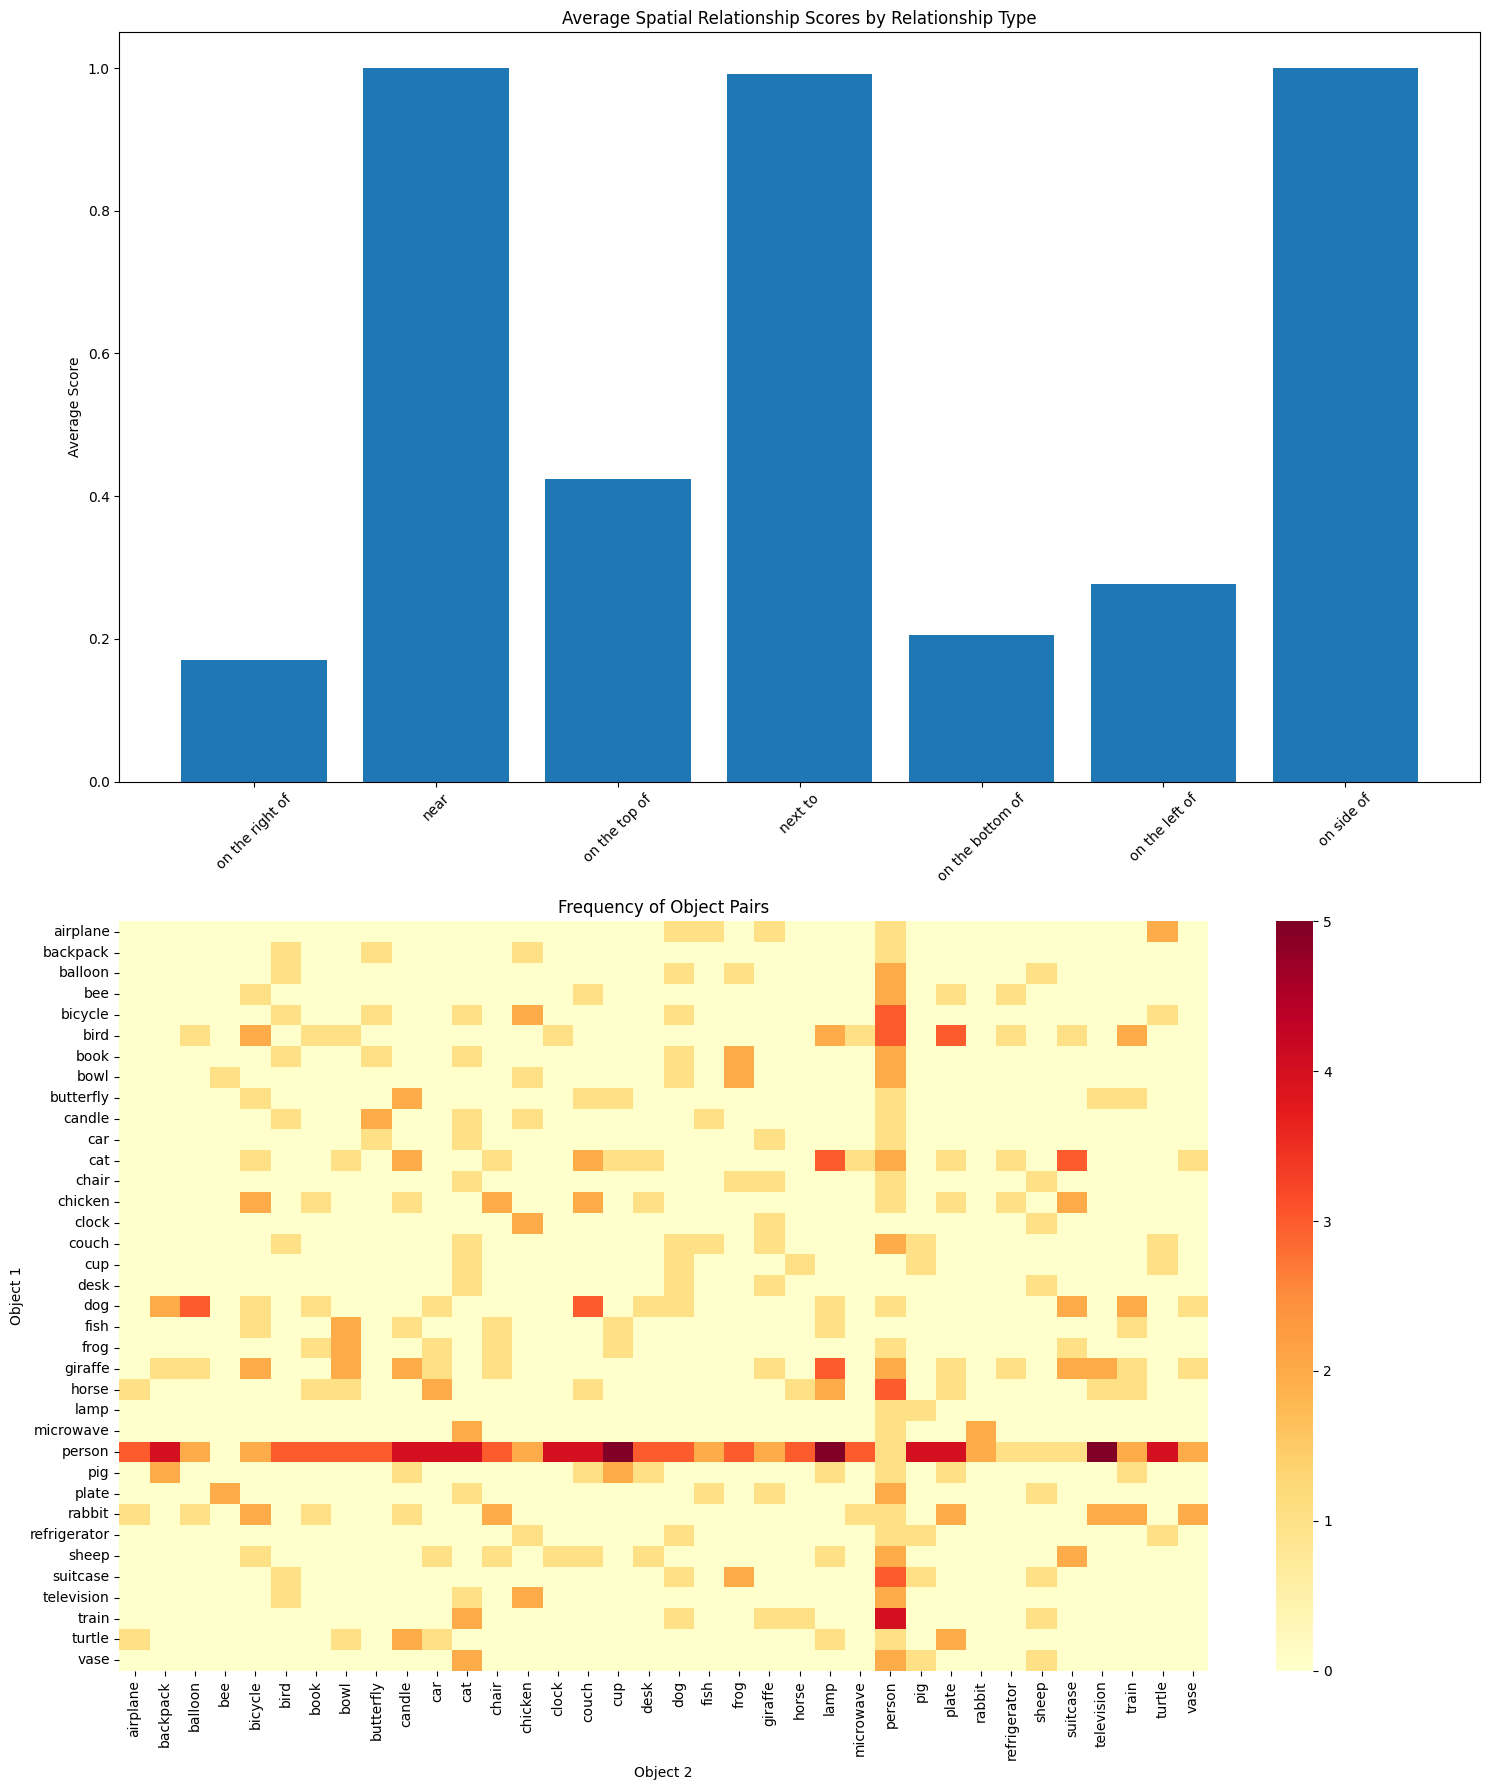

In [8]:
# Get unique objects and spatial relationships
unique_obj1 = set(df_correct_objects['obj1'].unique())
unique_obj2 = set(df_correct_objects['obj2'].unique())
unique_objects = unique_obj1.union(unique_obj2)
unique_relationships = set(df_correct_objects['locality'].unique())

# Create a matrix of spatial relationship scores
relationship_matrix = defaultdict(lambda: defaultdict(list))

for _, row in df_correct_objects.iterrows():
    relationship_matrix[row['locality']][(row['obj1'], row['obj2'])].append(row['spatial_relationship_score'])

# Calculate average scores for each relationship-object combination
avg_scores = {}
for rel in unique_relationships:
    for (obj1, obj2), scores in relationship_matrix[rel].items():
        if scores:  # Only include if there are scores
            avg_scores[(rel, obj1, obj2)] = sum(scores) / len(scores)

# Create visualizations
plt.figure(figsize=(15, 18))

# 1. Bar plot of average spatial relationship scores by relationship type
rel_scores = defaultdict(list)
for (rel, _, _), score in avg_scores.items():
    rel_scores[rel].append(score)

plt.subplot(2, 1, 1)
rel_means = {rel: sum(scores)/len(scores) for rel, scores in rel_scores.items()}
plt.bar(rel_means.keys(), rel_means.values())
plt.title('Average Spatial Relationship Scores by Relationship Type')
plt.xticks(rotation=45)
plt.ylabel('Average Score')

# 2. Heatmap of object pair frequencies
obj_pairs = defaultdict(int)
for (_, obj1, obj2), _ in avg_scores.items():
    obj_pairs[(obj1, obj2)] += 1

# Convert to matrix format
obj_list = sorted(list(unique_objects))
pair_matrix = pd.DataFrame(0, index=obj_list, columns=obj_list)
for (obj1, obj2), count in obj_pairs.items():
    pair_matrix.loc[obj1, obj2] = count

plt.subplot(2, 1, 2)
sns.heatmap(pair_matrix, cmap='YlOrRd')
plt.title('Frequency of Object Pairs')
plt.xlabel('Object 2')
plt.ylabel('Object 1')

plt.tight_layout()
#plt.savefig('spatial_relationship_analysis.png')
#plt.close()

# Print summary statistics
print("\nSummary Statistics:")
print(f"Total number of entries: {len(df)}")
print(f"Number of entries with both objects detected: {len(df_correct_objects)}")
print(f"\nUnique objects: {len(unique_objects)}")
print(f"Unique spatial relationships: {len(unique_relationships)}")
print("\nSpatial relationships:")
for rel in unique_relationships:
    print(f"- {rel}") 

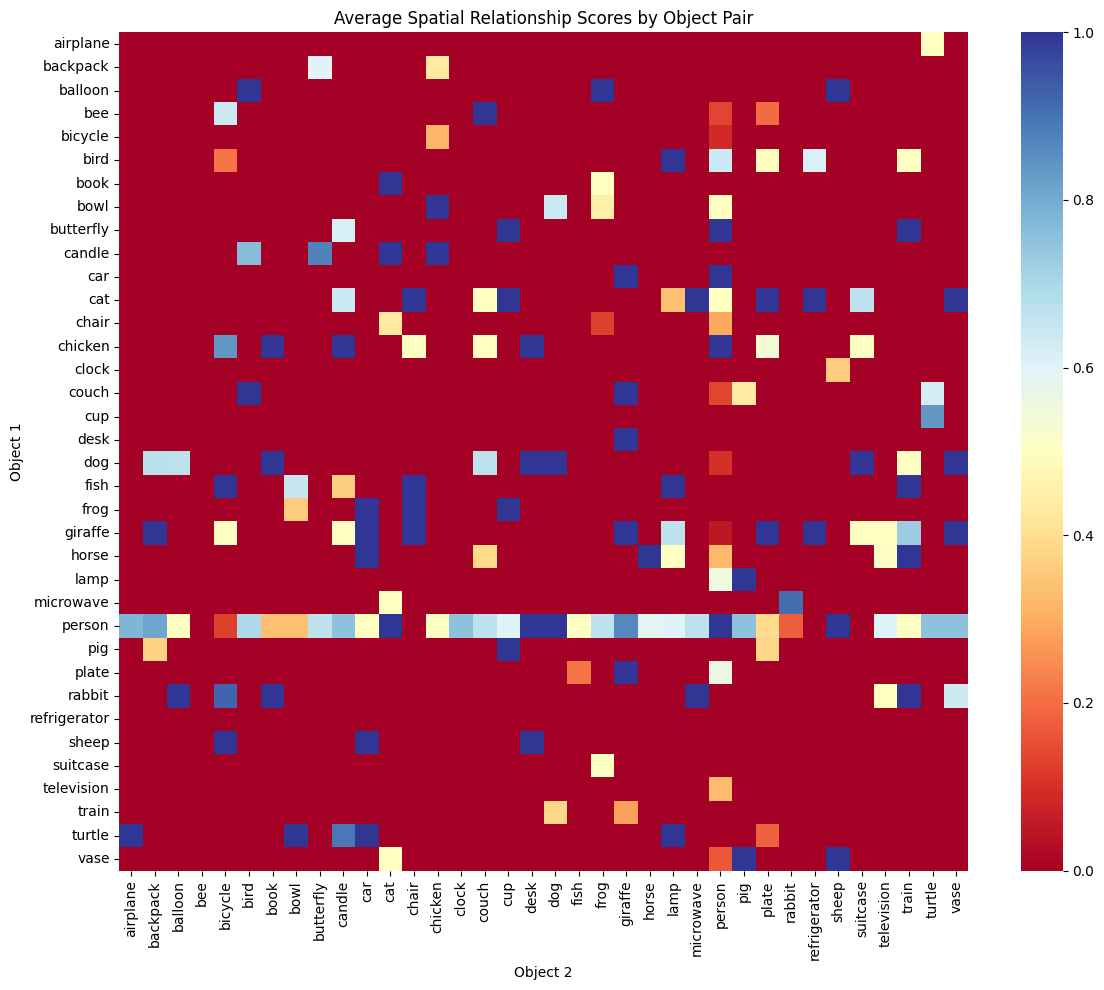

In [7]:
# Calculate average spatial scores for each object pair
obj_pair_scores = defaultdict(list)
for (_, obj1, obj2), score in avg_scores.items():
    obj_pair_scores[(obj1, obj2)].append(score)

# Calculate average scores
avg_pair_scores = {}
for (obj1, obj2), scores in obj_pair_scores.items():
    avg_pair_scores[(obj1, obj2)] = sum(scores) / len(scores)

# Convert to matrix format
obj_list = sorted(list(unique_objects))
score_matrix = pd.DataFrame(0.0, index=obj_list, columns=obj_list)
for (obj1, obj2), score in avg_pair_scores.items():
    score_matrix.loc[obj1, obj2] = score

# Create the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(score_matrix, cmap='RdYlBu', center=0.5, vmin=0, vmax=1)
plt.title('Average Spatial Relationship Scores by Object Pair')
plt.xlabel('Object 2')
plt.ylabel('Object 1')
plt.tight_layout()
plt.show()

### Combine across seeds

In [1]:
import json
import os
from collections import defaultdict

# List of seed files to process
root_dir = "../examples/labels/2025-05-06_custom_epochunknown_stepunknown_scale4.5_step14_size512_bs8_sampdpm-solver_seed"
root_dir2 = "../examples/labels/2025-05-10_custom_epochunknown_stepunknown_scale4.5_step14_size512_bs8_sampdpm-solver_seed"
seed_files = [
    root_dir+"1/annotation_obj_detection_2d/detailed_scores.json",
    root_dir+"2/annotation_obj_detection_2d/detailed_scores.json",
    root_dir+"3/annotation_obj_detection_2d/detailed_scores.json",
    root_dir+"4/annotation_obj_detection_2d/detailed_scores.json",
    root_dir+"5/annotation_obj_detection_2d/detailed_scores.json",
    root_dir2+"6/annotation_obj_detection_2d/detailed_scores.json",
    root_dir2+"7/annotation_obj_detection_2d/detailed_scores.json",
    root_dir2+"8/annotation_obj_detection_2d/detailed_scores.json",
    root_dir2+"9/annotation_obj_detection_2d/detailed_scores.json",
    root_dir2+"10/annotation_obj_detection_2d/detailed_scores.json"
]

# Dictionary to store entries where both objects are correctly generated
correct_entries = defaultdict(dict)
# Dictionary to track which entries have both objects detected in each seed
detection_status = defaultdict(lambda: defaultdict(bool))

# First pass: collect detection status for all entries across all seeds
for seed_file in seed_files:
    seed_num = int(seed_file.split('seed')[-1].split('/')[0])
    
    with open(seed_file, 'r') as f:
        data = json.load(f)
        
    for entry in data:
        key = f"{entry['prompt']}_{entry['image']}"
        detection_status[key][f'seed_{seed_num}'] = entry['obj1_detected'] and entry['obj2_detected']

# Second pass: only process entries that have both objects detected in ALL seeds
for seed_file in seed_files:
    seed_num = int(seed_file.split('seed')[-1].split('/')[0])
    
    with open(seed_file, 'r') as f:
        data = json.load(f)
        
    for entry in data:
        key = f"{entry['prompt']}_{entry['image']}"
        
        # Check if this entry has both objects detected in ALL seeds
        if all(detection_status[key].values()):
            if key not in correct_entries:
                # Initialize the entry with the first occurrence
                correct_entries[key] = {
                    'question_id': entry['question_id'],
                    'image': entry['image'],
                    'prompt': entry['prompt'],
                    'locality': entry['locality'],
                    'obj1': entry['obj1'],
                    'obj2': entry['obj2'],
                    'obj1_detected': entry['obj1_detected'],
                    'obj2_detected': entry['obj2_detected'],
                    'obj1_confidence': entry['obj1_confidence'],
                    'obj2_confidence': entry['obj2_confidence'],
                    'spatial_relationship_score': {},
                    'final_score': entry['final_score']
                }
            
            # Add the spatial relationship score for this seed
            correct_entries[key]['spatial_relationship_score'][f'seed_{seed_num}'] = entry['spatial_relationship_score']

# Convert the dictionary to a list
#combined_scores = list(correct_entries.values())

# Save the combined scores


In [4]:
# Filter entries to keep only those with varying spatial relationship scores
filtered_entries = {}
for key, entry in correct_entries.items():
    spatial_scores = list(entry['spatial_relationship_score'].values())
    # Check if scores show variation (not all above 0.5 or all below 0.5)
    if not (all(score > 0.5 for score in spatial_scores) or all(score < 0.5 for score in spatial_scores)):
        filtered_entries[key] = entry

# Convert binary mask dictionary to 2D array
# Convert to dictionary with prompt IDs as keys
binary_mask_dict = {}
for entry in filtered_entries.values():
    scores = []
    for seed_num in range(1, 11):  # Assuming 5 seeds
        seed_key = f'seed_{seed_num}'
        score = 1 if entry['spatial_relationship_score'][seed_key] > 0.5 else 0
        scores.append(score)
    binary_mask_dict[entry['question_id']] = scores
binary_mask = binary_mask_dict



# Convert the dictionary to a list
combined_scores = list(filtered_entries.values())

In [5]:
binary_mask

{18: [1, 1, 0, 1, 1, 1, 0, 0, 1, 1],
 59: [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
 85: [0, 0, 1, 0, 1, 0, 1, 0, 0, 0],
 86: [1, 0, 0, 0, 0, 0, 0, 0, 0, 1],
 92: [1, 0, 0, 1, 1, 0, 0, 0, 0, 0],
 99: [0, 1, 0, 0, 0, 1, 0, 0, 0, 0],
 103: [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
 104: [0, 0, 0, 1, 0, 0, 1, 0, 0, 0],
 114: [0, 1, 0, 1, 0, 0, 1, 1, 0, 0],
 144: [1, 1, 1, 1, 1, 1, 0, 1, 0, 1],
 150: [0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
 151: [0, 0, 0, 1, 0, 1, 0, 0, 0, 0],
 168: [1, 1, 1, 1, 0, 0, 1, 0, 0, 1],
 183: [0, 0, 0, 0, 1, 1, 0, 0, 0, 0],
 203: [0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
 228: [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
 243: [1, 1, 0, 1, 1, 0, 0, 0, 1, 0],
 261: [0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
 274: [0, 0, 1, 0, 0, 0, 1, 0, 0, 0],
 281: [1, 1, 1, 1, 1, 1, 1, 1, 1, 0],
 303: [1, 1, 0, 0, 1, 1, 1, 0, 1, 1],
 305: [0, 0, 1, 0, 0, 0, 1, 0, 0, 0],
 312: [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
 326: [1, 1, 1, 0, 1, 0, 0, 0, 0, 1],
 331: [1, 1, 1, 1, 1, 1, 1, 0, 1, 1],
 379: [1, 1, 0, 0, 0, 0, 0, 1, 1, 0],
 392: [1, 1, 1, 0,

In [6]:
#binary_mask
import pickle

# Save binary mask as pickle file
with open('binary_mask.pkl', 'wb') as f:
    pickle.dump(binary_mask, f)


In [7]:
filtered_qids = [list(i.values())[0] for i in combined_scores]

In [8]:
with open('filtered_qids.json', 'w') as f:
    json.dump(filtered_qids, f)

In [2]:
import pickle
# Load prompts from spatial.txt
with open('/n/home13/xupan/holylabs/DiffusionObjectRelation/PixArt-alpha/asset/spatial.txt', 'r') as f:
    prompts = [line.strip() for line in f if line.strip()]

# Load binary mask from pickle file
with open('/n/home13/xupan/holylabs/DiffusionObjectRelation/analysis_script/binary_mask.pkl', 'rb') as f:
    binary_mask = pickle.load(f)

# Get prompt IDs from binary mask keys
mask_keys = list(binary_mask.keys())

# Filter prompts based on binary mask keys
filtered_prompts = []
for idx, prompt in enumerate(prompts):
    if idx in mask_keys:
        filtered_prompts.append(prompt)

# Save filtered prompts to new txt file
with open('filtered_spatial.txt', 'w') as f:
    for prompt in filtered_prompts:
        f.write(prompt + '\n')

print(f"Original prompts: {len(prompts)}")
print(f"Filtered prompts: {len(filtered_prompts)}")


Original prompts: 1000
Filtered prompts: 69
